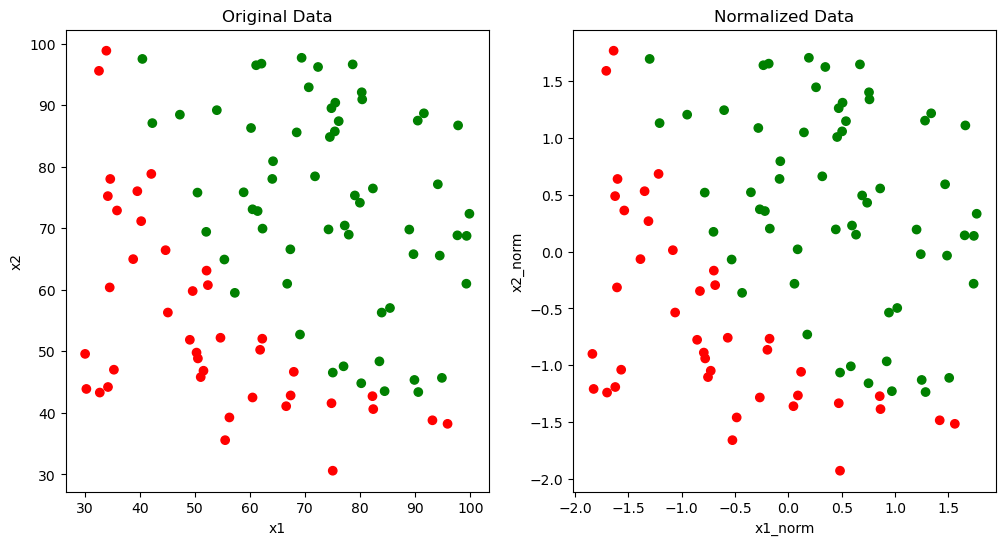

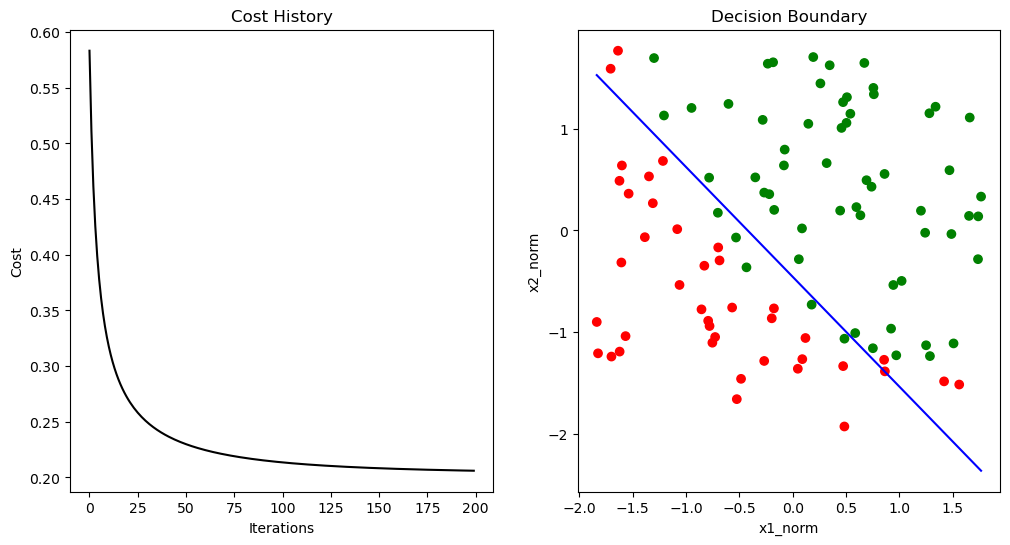

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('data.txt', sep=',', header=None, names=['x1', 'x2', 'y'])
m = len(data)

x1 = data['x1'].values.reshape(m, 1)
x2 = data['x2'].values.reshape(m, 1)
y = data['y'].values.reshape(m, 1)

# Normalize data
def normalize_data(x):
    x_norm = (x - np.mean(x)) / np.std(x)
    return x_norm

x1_norm = normalize_data(x1)
x2_norm = normalize_data(x2)

color = ['red' if val == 0 else 'green' for val in y]
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(x1, x2, color=color)
plt.title('Original Data')
plt.xlabel('x1')
plt.ylabel('x2')

# Plot normalized data
plt.subplot(1, 2, 2)
plt.scatter(x1_norm, x2_norm, color=color)
plt.title('Normalized Data')
plt.xlabel('x1_norm')
plt.ylabel('x2_norm')

plt.show()

# Prepare data for logistic regression
X = np.hstack((np.ones((m, 1)), x1_norm, x2_norm))

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define cost function

def compute_cost(x, y, theta):
    m = len(y)  # Number of samples
    epsilon = 1e-15  # Small epsilon to avoid log(0)
    
    # Calculate the loss
    J = -(1/m) * np.sum(y * np.log(sigmoid(x @ theta) + epsilon) + (1 - y) * np.log(1 - sigmoid(x @ theta) + epsilon))
    
    return J


# Define gradient descent for logistic regression
def logistic_regression(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

# Initialize theta and hyperparameters
initial_theta = np.zeros((3, 1))
learning_rate = 0.8
iterations = 200

# Train logistic regression
theta, J_history = logistic_regression(X, y, initial_theta, learning_rate, iterations)

# Plot cost history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(J_history)), J_history, color='black')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')

# Plot decision boundary
plt.subplot(1, 2, 2)
plt.scatter(x1_norm, x2_norm, color=color)
x_boundary = np.array([min(x1_norm), max(x1_norm)])
y_boundary = (-1 / theta[2]) * (theta[1] * x_boundary + theta[0])
plt.plot(x_boundary, y_boundary, color='blue')
plt.xlabel('x1_norm')
plt.ylabel('x2_norm')
plt.title('Decision Boundary')
plt.show()
